# Bayesian Regression
## 


## Import all the libraries and Regression models & Metrics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score, accuracy_score

import warnings
warnings.filterwarnings("ignore")

### Load Boston dataset

In [2]:
from sklearn.datasets import load_boston

boston_data = load_boston()

### Check the type of the dataset

In [3]:
type(boston_data)

sklearn.utils.Bunch

### Find the keys of the dataset

In [4]:
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

### Understand the data by printing the description

In [5]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Check the feature names (Independent Variables)

In [6]:
boston_data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### Number of rows and columns

In [7]:
boston_data.data.shape

(506, 13)

### Print some of the data

In [8]:
boston_data.data[:4]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00]])

### Print the target values

In [9]:
boston_data.target[:4]

array([24. , 21.6, 34.7, 33.4])

## Make a dataframe and load our data with features

In [10]:
boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Add target columns to the dataset with all the features

In [11]:
boston['target'] = boston_data.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Basic information about the each column

In [12]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### Describe the data to find min, max, mean etc

In [13]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Check if there is any null value or not

In [14]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

## Find correlation between all the columns

In [15]:
cm = boston.corr()
cm

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


## Graphical Repressentation of the Correlation matrix

<AxesSubplot:>

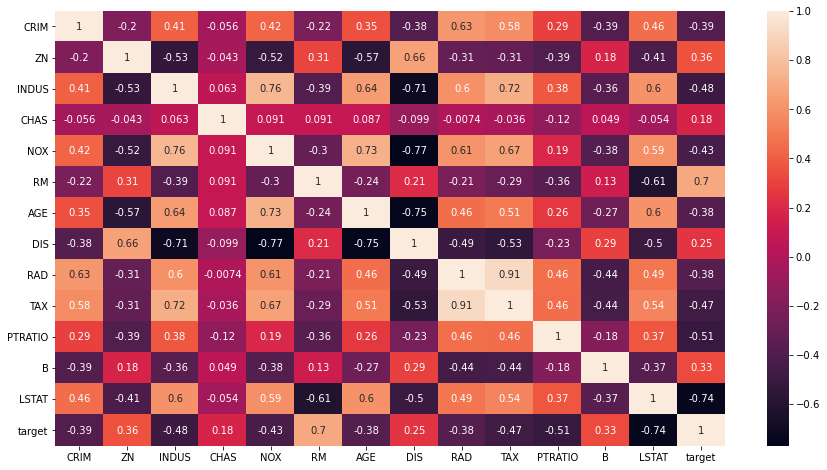

In [16]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(cm,annot=True)

## Distplot of the target column

<AxesSubplot:xlabel='target', ylabel='Density'>

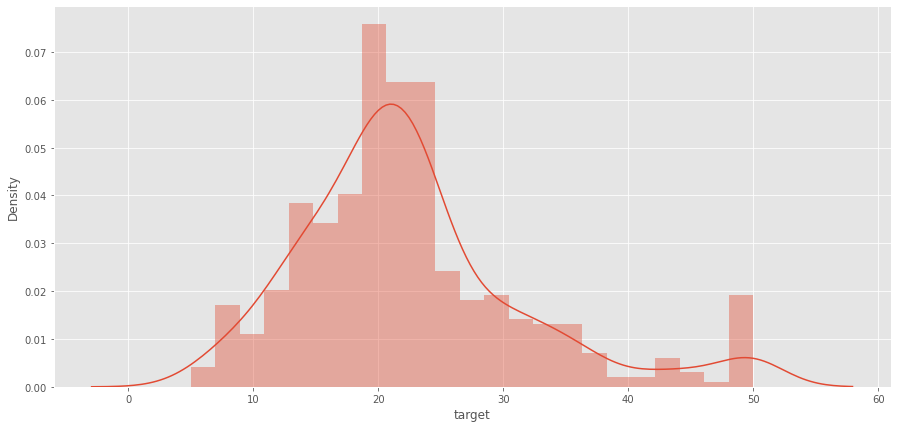

In [17]:
plt.figure(figsize=(15,7))
plt.style.use('ggplot')
sns.distplot(boston['target'])

## Split our data into train and test sets

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(boston_data.data,boston_data.target,test_size=.20)

### Check the shape of the new datasets

In [19]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


## Train the Linear Regression model

In [20]:
lmodel = LinearRegression()
lmodel.fit(X_train,Y_train)
Y_predictl = lmodel.predict(X_test)

## Train the Bayesian model

In [21]:
model = BayesianRidge()
model.fit(X_train,Y_train)
Y_predict = model.predict(X_test)

### Print the predicted data and compare it with actual data

In [22]:
print("\n\nLinear Model Predicted Value: \n\t",Y_predictl[:5])
print("\n\nBayesian Model Predicted Value: \n\t",Y_predict[:5])
print("\n\nActual Value: \n\t",Y_test[:5])




Linear Model Predicted Value: 
	 [13.69366428 31.32992054 13.957893   16.94437593 20.17768203]


Bayesian Model Predicted Value: 
	 [12.23783686 29.84529684 14.50366916 16.48743042 22.28256996]


Actual Value: 
	 [13.4 50.  10.9 10.2 21.1]


## Scatter plot and regression line of the actual and predicted data for both models

Text(0, 0.5, 'Predicted')

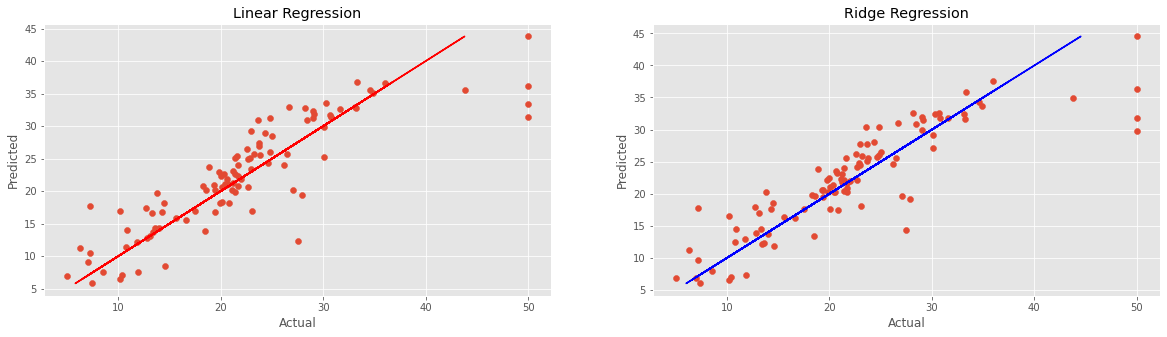

In [23]:
fig, axes = plt.subplots(1,2,figsize = (20,5))

axes[0].scatter(Y_test, Y_predictl)
axes[0].plot(Y_predictl, Y_predictl,'r')
axes[0].set_title('Linear Regression')
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predicted')

axes[1].scatter(Y_test, Y_predict)
axes[1].plot(Y_predict,Y_predict,'b')
axes[1].set_title('Ridge Regression')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predicted')

## Distplot of actual and predicted data for both models

<AxesSubplot:ylabel='Density'>

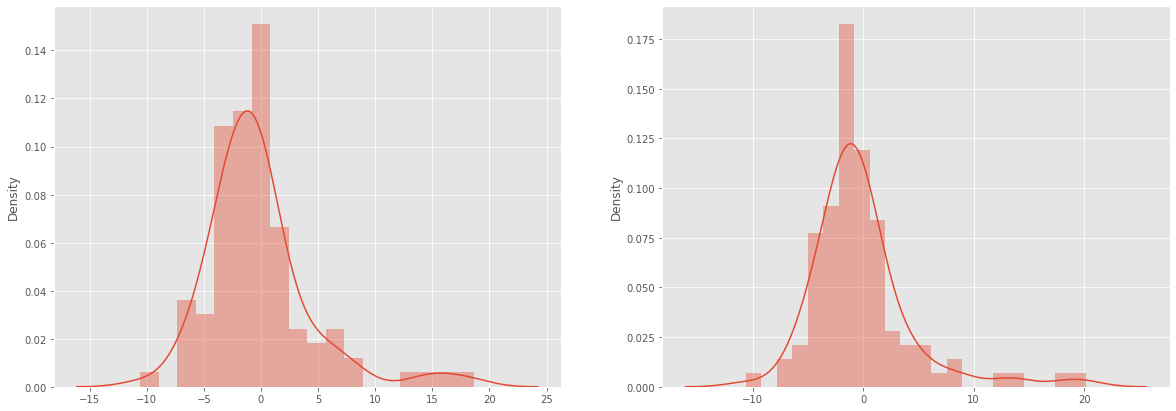

In [24]:
plt.style.use('ggplot')
fig, axes = plt.subplots(1,2,figsize = (20,7))

sns.distplot(Y_test - Y_predictl, ax=axes[0])
sns.distplot(Y_test - Y_predict, ax=axes[1])

## Find the Matrix Evaluation

In [25]:
matrix_evaluation = pd.DataFrame({'Model' :['Linear Regression','Bayesian Regression'],
                                'MAE': [mean_absolute_error(Y_test,Y_predictl),
                                        mean_absolute_error(Y_test,Y_predict)], 
                                'MSE': [mean_squared_error(Y_test,Y_predictl),
                                        mean_squared_error(Y_test,Y_predict)],
                                'RMSE': [np.sqrt(mean_squared_error(Y_test,Y_predictl)),
                                         np.sqrt(mean_squared_error(Y_test,Y_predict))],
                                'R2_score': [r2_score(Y_test,Y_predictl),          
                                             r2_score(Y_test,Y_predict)]})
matrix_evaluation

,Model,MAE,MSE,RMSE,R2_score
0,Linear Regression,3.161355,21.706728,4.659048,0.748845
1,Bayesian Regression,3.012507,20.949928,4.577109,0.757602



### R2 score is almost same in both models

## Now check the model with some random data

In [26]:
import random 
random.seed(7889)

# Gives a random number between 0 and total length of the dataset
random_num = random.randint(0,len(boston))

# Selects a random column with random number we found above
trail1 = boston.drop('target', axis=1).iloc[random_num]

In [27]:
trail1

CRIM         0.03584
ZN          80.00000
INDUS        3.37000
CHAS         0.00000
NOX          0.39800
RM           6.29000
AGE         17.80000
DIS          6.61150
RAD          4.00000
TAX        337.00000
PTRATIO     16.10000
B          396.90000
LSTAT        4.67000
Name: 65, dtype: float64

In [28]:
trail1 = trail1.values.reshape(1,-1)
trail1

array([[3.5840e-02, 8.0000e+01, 3.3700e+00, 0.0000e+00, 3.9800e-01,
        6.2900e+00, 1.7800e+01, 6.6115e+00, 4.0000e+00, 3.3700e+02,
        1.6100e+01, 3.9690e+02, 4.6700e+00]])

In [29]:
print(X_test.shape)
print(trail1.shape)

(102, 13)
(1, 13)


### Predict with linear model

In [30]:
lmodel.predict(trail1)[0]

30.450455275245808

### Predict with Bayesian model

In [31]:
model.predict(trail1)[0]

30.16992740127294

### Actual Data

In [32]:
boston.iloc[random_num]['target']

23.5

In [33]:
pred = pd.DataFrame({'Type': ['Actual value', 'Linear_Prediction', 'Bayes_Prediction'],
                         'Value': [boston.iloc[random_num]['target'], 
                                   lmodel.predict(trail1)[0], 
                                   model.predict(trail1)[0]]})

## Compare data

In [34]:
pred

,Type,Value
0,Actual value,23.500000
1,Linear_Prediction,30.450455
2,Bayes_Prediction,30.169927


### We can see that Bayesian model gives nearest prediction to the actual data. So it is safe to use Bayesian as compared to Linear model in this dataset